In [1]:
import pandas as pd
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import plot_confusion_matrix
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression

In [2]:
stadiums = pd.read_csv('nfl_stadiums.csv')

In [3]:
spread = pd.read_csv('spreadspoke_scores.csv')

In [4]:
teams = pd.read_csv('nfl_teams.csv')

# A little about betting

## What is a point spread? Why does it usually have a .5 at the end? 

### The point spread is the expected final score difference between two teams. It is represented as both a negative and positive number; if the spread is 3 points, you'll see that as both -3 and +3. The team that is the favorite to win gets the minus-number (-3); the underdog gets the plus-number (+3). 

### But the actual number itself, ignoring the plus-minus sign, will always be the same for both teams, because, again, that's the expected margin of victory. 

### If Team A is a 3-point favorite over Team B, Team A has to win by more than 3 points to win the bet, or "cover." Team B can win the game outright or lose by one or two points (but no more than that) and they "cover." 

https://www.foxsports.com/stories/nfl/point-spread-over-under

# Why is this important? 

### An estimated 45.2 million Americans plan to wager on the NFL season in some form, up 36% from last year, according to research from the American Gaming Association. At least 

### 12 billion will be bet on the NFL this season, according to sports betting market tracker PlayUSA.

https://www.cnbc.com/2021/09/09/more-americans-will-wager-on-the-nfl-as-the-league-embraces-betting.html

# The Quesion Being Posed Here 

### What can you expect your monthly income to be if you bet the spread of games each week 

## Stadiums 

### I need absolutely nothing from this particular CSV there is also a ton of nan factors and outdated stadiums I won't be utilizing this in my model but it takes 12.5 KB so I will be hashtagging out of this. 

In [5]:
#stadiums.info()

## Spread 

### I will  be dropping schedule date as I don't think the day has a correlation on spread 
### I will be dropping schedule season prior to 2012 as I want to do a 10 year tenure  
### Schedule week does not have a direct correlation to the over or under of the spread
### I don't want schedule_playoff to play a part in over under spread either 

### Team_Home will be kept 
### Score_Home will be kept 
### Score away will be kept 
### Team_Away will be kept 
### Team Favorite Id will be kept 
### Spread_favorite Target Variable
### Over_under_line dropped for now 
### Stadium Dropped 
### Stadium neutal dropped 
### All Weather ccolumns will be dropped 
### schedule_dropped below 2013. completed.

In [6]:
spread
spread.drop(index = spread[spread['schedule_season'] <= 2012].index, inplace = True)
spread.drop(columns = ['stadium','over_under_line','weather_temperature','weather_wind_mph','schedule_week','weather_humidity','weather_detail','schedule_playoff','schedule_date','stadium_neutral'], inplace = True)

In [7]:
spread['team_home'].str.strip()

10809          Denver Broncos
10810           Buffalo Bills
10811       Carolina Panthers
10812           Chicago Bears
10813        Cleveland Browns
                 ...         
13227      Kansas City Chiefs
13228    Tampa Bay Buccaneers
13229      Kansas City Chiefs
13230        Los Angeles Rams
13231        Los Angeles Rams
Name: team_home, Length: 2423, dtype: object

## The function below adds the "final_spread column to the spread dataframe

In [8]:
def finalspread(home, away):
    return home - away

In [9]:
spread['final_spread'] = finalspread(spread['score_home'], spread['score_away'])
spread.reset_index(drop = True, inplace = True)
spread

,schedule_season,team_home,score_home,score_away,team_away,team_favorite_id,spread_favorite,final_spread
0,2013,Denver Broncos,49.0,27.0,Baltimore Ravens,DEN,-7.5,22.0
1,2013,Buffalo Bills,21.0,23.0,New England Patriots,NE,-10.5,-2.0
2,2013,Carolina Panthers,7.0,12.0,Seattle Seahawks,SEA,-3.5,-5.0
3,2013,Chicago Bears,24.0,21.0,Cincinnati Bengals,CHI,-3.0,3.0
4,2013,Cleveland Browns,10.0,23.0,Miami Dolphins,CLE,-2.5,-13.0
...,...,...,...,...,...,...,...,...
2418,2021,Kansas City Chiefs,42.0,36.0,Buffalo Bills,KC,-2.5,6.0
2419,2021,Tampa Bay Buccaneers,27.0,30.0,Los Angeles Rams,TB,-3.0,-3.0
2420,2021,Kansas City Chiefs,24.0,27.0,Cincinnati Bengals,KC,-7.0,-3.0
2421,2021,Los Angeles Rams,20.0,17.0,San Francisco 49ers,LAR,-3.5,3.0


C:\Users\metropolitanparkapts\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='spread_favorite'>

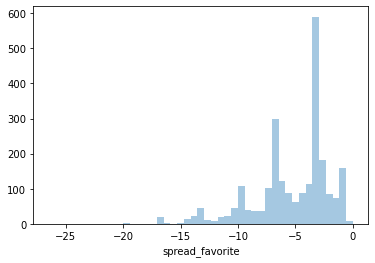

In [10]:
sns.distplot(spread.spread_favorite, 
             kde=False)

## Teams 

### I will be keeping team_division as divisiional games actually have a significant dilema on spread. 

In [11]:
teams

,team_name,team_name_short,team_id,team_id_pfr,team_conference,team_division,team_conference_pre2002,team_division_pre2002
0,Arizona Cardinals,Cardinals,ARI,CRD,NFC,NFC West,NFC,NFC West
1,Phoenix Cardinals,Cardinals,ARI,CRD,NFC,NaN,NFC,NFC East
2,St. Louis Cardinals,Cardinals,ARI,ARI,NFC,NaN,NFC,NFC East
3,Atlanta Falcons,Falcons,ATL,ATL,NFC,NFC South,NFC,NFC West
4,Baltimore Ravens,Ravens,BAL,RAV,AFC,AFC North,AFC,AFC Central
5,Buffalo Bills,Bills,BUF,BUF,AFC,AFC East,AFC,AFC East
6,Carolina Panthers,Panthers,CAR,CAR,NFC,NFC South,NFC,NFC West
7,Chicago Bears,Bears,CHI,CHI,NFC,NFC North,NFC,NFC Central
8,Cincinnati Bengals,Bengals,CIN,CIN,AFC,AFC North,AFC,AFC Central
9,Cleveland Browns,Browns,CLE,CLE,AFC,AFC North,AFC,AFC Central


In [12]:
teams.drop(columns = ['team_name_short','team_id_pfr','team_conference','team_conference_pre2002','team_division_pre2002'], inplace = True)

In [13]:
teams

,team_name,team_id,team_division
0,Arizona Cardinals,ARI,NFC West
1,Phoenix Cardinals,ARI,NaN
2,St. Louis Cardinals,ARI,NaN
3,Atlanta Falcons,ATL,NFC South
4,Baltimore Ravens,BAL,AFC North
5,Buffalo Bills,BUF,AFC East
6,Carolina Panthers,CAR,NFC South
7,Chicago Bears,CHI,NFC North
8,Cincinnati Bengals,CIN,AFC North
9,Cleveland Browns,CLE,AFC North


In [14]:
#I have to drop the teams who haven't been teams within the last 10 years of the NFL 

teams.drop(index=teams[teams['team_name'] == 'Tennessee Oilerss'].index, inplace = True)
teams.drop(index=teams[teams['team_name'] == 'Houston Oilers'].index, inplace = True)
teams.drop(index=teams[teams['team_name'] == 'Los Angeles Raiders'].index, inplace = True)
teams.drop(index=teams[teams['team_name'] == 'Tennessee Oilers'].index, inplace = True)
teams.drop(index=teams[teams['team_name'] == 'Phoenix Cardinals'].index, inplace = True)
teams.drop(index=teams[teams['team_name'] == 'St. Louis Cardinals'].index, inplace = True)
teams.drop(index=teams[teams['team_name'] == 'Boston Patriots'].index, inplace = True)
teams.drop(index=teams[teams['team_name'] == 'Baltimore Colts'].index, inplace = True)
teams.reset_index(drop=True, inplace=True)
teams['team_name'].str.strip()
teams

,team_name,team_id,team_division
0,Arizona Cardinals,ARI,NFC West
1,Atlanta Falcons,ATL,NFC South
2,Baltimore Ravens,BAL,AFC North
3,Buffalo Bills,BUF,AFC East
4,Carolina Panthers,CAR,NFC South
5,Chicago Bears,CHI,NFC North
6,Cincinnati Bengals,CIN,AFC North
7,Cleveland Browns,CLE,AFC North
8,Dallas Cowboys,DAL,NFC East
9,Denver Broncos,DEN,AFC West


## I want to add individual column of conference to the spread and increase the weight of these games... 

In [15]:
divisions = {
    'NFC_West': ['Arizona Cardinals', 'Seattle Seahawks', 'Los Angeles Rams', 'San Francisco 49ers', 'St. Louis Rams'],
    'NFC_South':['Tampa Bay Buccaneers', 'New Orleans Saints','Carolina Panthers','Atlanta Falcons'],
    'NFC_East': ['Washington Football Team','Washington Redskins','New York Giants','Philadelphia Eagles','Dallas Cowboys'],
    'NFC_North': ['Chicago Bears','Detroit Lions','Green Bay Packers','Minnesota Vikings'],
    'AFC_South': ['Tennessee Titans','Jacksonville Jaguars','Indianapolis Colts','Houston Texans'],
    'AFC_North': ['Pittsburgh Steelers','Cincinnati Bengals','Cleveland Browns','Baltimore Ravens'],
    'AFC_West': ['Las Vegas Raiders','Oakland Raiders','San Diego Chargers','Los Angeles Chargers','Denver Broncos','Kansas City Chiefs'],
    'AFC_East': ['New England Patriots','Miami Dolphins','Buffalo Bills','New York Jets']}

In [22]:
#The Home Team Division 
division_l = []
for value, row in enumerate(divisions):
    #print(value,row)
    #division_l.append(spread['team_home'].iloc[value])
    
#spread['home_division'] = division_l

SyntaxError: unexpected EOF while parsing (<ipython-input-22-2e777a560f81>, line 7)

In [43]:
#The Away Team Division
division_2 = []
def get_division(spread['team_away']):
    for value, row in enumerate(spread['team_away']):
    #print(value,row)
        division_2.append(get_division(spread['team_away'].iloc[value]))
    
spread['away_division'] = division_2

SyntaxError: invalid syntax (<ipython-input-43-d77af217e2dc>, line 3)

In [42]:
division_2 = []

def get_division(team):
    for value, row in enumerate(spread['team_away']):
            division_2.append(get_division(spread['team_away'].iloc[value]))
spread['Away_division'] = division_2

ValueError: Length of values (0) does not match length of index (2423)

[]

In [19]:
spread.head(5)

,schedule_season,team_home,score_home,score_away,team_away,team_favorite_id,spread_favorite,final_spread,home_division
0,2013,Denver Broncos,49.0,27.0,Baltimore Ravens,DEN,-7.5,22.0,Denver Broncos
1,2013,Buffalo Bills,21.0,23.0,New England Patriots,NE,-10.5,-2.0,Buffalo Bills
2,2013,Carolina Panthers,7.0,12.0,Seattle Seahawks,SEA,-3.5,-5.0,Carolina Panthers
3,2013,Chicago Bears,24.0,21.0,Cincinnati Bengals,CHI,-3.0,3.0,Chicago Bears
4,2013,Cleveland Browns,10.0,23.0,Miami Dolphins,CLE,-2.5,-13.0,Cleveland Browns


In [ ]:
SRS_2021 = pd.read_excel('SRS 2021.xlsx')
SRS_2021_2 = pd.read_excel('SRS 2021 2.xlsx')
SRS_2020 = pd.read_excel('SRS 2020.xlsx')
SRS_2020_2 = pd.read_excel('SRS 2020 2.xlsx')
SRS_2019 = pd.read_excel('SRS 2019.xlsx')
SRS_2019_2 = pd.read_excel('SRS 2019 2.xlsx')

In [ ]:
# We are trying to decide whether or not to choose the favortied team for the spread. 
# Favorite team = True/False 
# What division the team is in and whether they won or lost last game would help decide what to favor. 
#New column "won Last game"/True or false manually entering.. 
#a new dataframe that tells you 1/0 if team won or lost. from the previous season. team name and won or loss.
#home favorite = true/false (teamfavoredd to win is home or not home!)

In [ ]:
X = spread.drop('spread_favorite', axis=1)
y = spread['spread_favorite']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=40)


In [ ]:
NFC_SRS19 = SRS_2019_2.groupby('Tm')['SRS'].sum()
AFC_SRS19 = SRS_2019.groupby('Tm')['SRS'].sum()
NFC_SRS20 = SRS_2020_2.groupby('Tm')['SRS'].sum()
AFC_SRS20 = SRS_2020.groupby('Tm')['SRS'].sum()
AFC_SRS21 = SRS_2021_2.groupby('Tm')['SRS'].sum()
NFC_SRS21 = SRS_2021.groupby('Tm')['SRS'].sum()

In [ ]:
sns.countplot(SRS_2019['SRS'])

In [ ]:
division_2 = []
for value, row in enumerate(spread['team_away']):
    #print(value,row)
    division_2.append(get_division(spread['team_away'].iloc[value]))
    
spread['away_division'] = division_2

In [ ]:
sns.countplot(spread['team_favorite_id'])

In [ ]:
does

In [ ]:
AFC

In [ ]:
AFC21['SRS']